# SHERAZ AHMAD

## TASK : 3 MUSIC RECCOMENDATION SYSTEM

## INTERNSHIP MONTH : AUGUST

## STEP 1: Import necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten
from tensorflow.keras.models import Model

## Step 2: Load and preprocess data

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

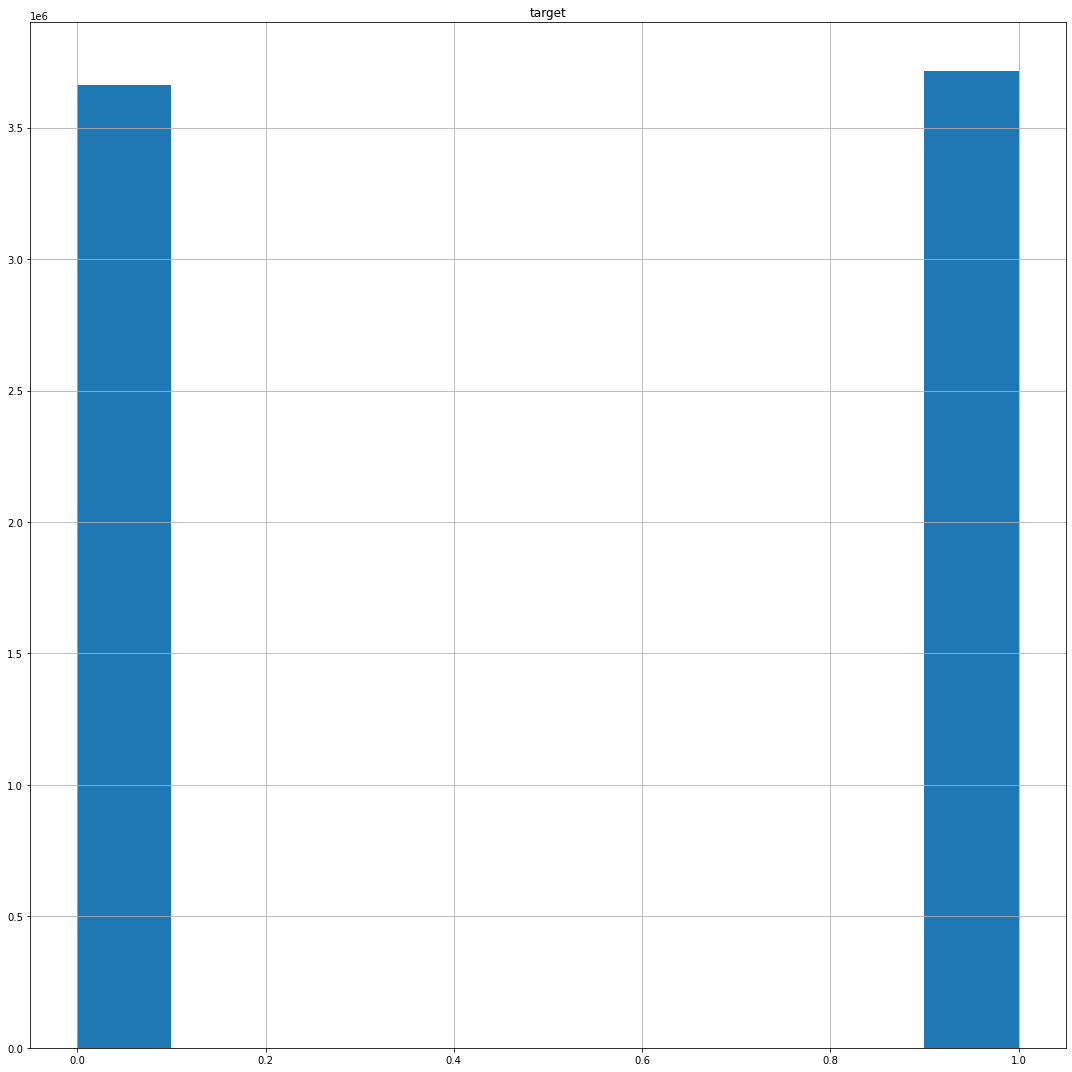

In [7]:
train_data.hist(figsize = (15 , 15))
plt.tight_layout()
plt.show

In [8]:
#Encoding
user_encoder = LabelEncoder()
song_encoder = LabelEncoder()

In [8]:
# Combine train and test data for encoding
combined_data = pd.concat([train_data, test_data], axis=0)

In [9]:
# Fit the encoders on the combined data
user_encoder.fit(combined_data['msno'])
song_encoder.fit(combined_data['song_id'])

LabelEncoder()

In [10]:
# Transform the data
train_data['msno'] = user_encoder.transform(train_data['msno'])
train_data['song_id'] = song_encoder.transform(train_data['song_id'])

In [11]:
test_data['msno'] = user_encoder.transform(test_data['msno'])
test_data['song_id'] = song_encoder.transform(test_data['song_id'])

In [12]:
num_users = combined_data['msno'].nunique()
num_songs = combined_data['song_id'].nunique()

##  Step 3: Build the recommendation model

In [17]:
def build_model(num_users, num_songs, embedding_size=50):
    user_input = Input(shape=(1,))
    song_input = Input(shape=(1,))

    user_embedding = Embedding(num_users, embedding_size)(user_input)
    song_embedding = Embedding(num_songs, embedding_size)(song_input)

    user_vec = Flatten()(user_embedding)
    song_vec = Flatten()(song_embedding)

    dot_product = Dot(axes=1)([user_vec, song_vec])

    model = Model(inputs=[user_input, song_input], outputs=dot_product)
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

##  Step 4: Train the model

In [ ]:
model = build_model(num_users, num_songs)
history = model.fit(
    [train_data['msno'], train_data['song_id']],
    train_data['target'],
    batch_size=64,
    epochs=10,
    validation_split=0.2
)


##  Step 5: Evaluate the model

In [ ]:
test_predictions = model.predict([test_data['msno'], test_data['song_id']])
mse = mean_squared_error(test_data['target'], test_predictions)
print(f'Mean Squared Error: {mse}')